In [1]:
import pathlib
import os
import pandas as pd

import matplotlib.pyplot as plt
import datetime
%matplotlib inline

import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import mapclassify

In [2]:
import pymysql

In [3]:
import contextily as ctx
import matplotlib.pyplot as plt

from shapely.ops import cascaded_union

from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area
from geovoronoi import voronoi_regions_from_coords, points_to_coords

In [4]:
db = pymysql.connect(host='localhost',
                     user='root',
                     password='password',
                     database='chicago')
cursor = db.cursor()

In [5]:
sqlcom ="SELECT node_id,lat,lon FROM sound_node"
df= pd.read_sql(sqlcom, con=db)
print(df)

         node_id         lat                 lon
0   001e0610ba46   41.878377          -87.627678
1   001e0610ba13   41.751238           -87.71299
2   001e0610bc10   41.736314          -87.624179
3   001e0610ba15   41.722457           -87.57535
4   001e0610bbe5   41.736495          -87.614529
5   001e0610ee36   41.751295          -87.605288
6   001e0610ee5d   41.923996          -87.761072
7   001e06113ad8   41.866786          -87.666306
8   001e0611441e   41.808594          -87.665048
9   001e06112e77   41.786756          -87.664343
10  001e0610f6db   41.791329          -87.598677
11  001e06113107   41.751142           -87.71299
12  001e06113ace    41.83107          -87.617298
13  001e06113a24   41.788979          -87.597995
14  001e061144cd     41.8742          -87.666599
15  001e061146cb  41.9140942          -87.683022
16  001e0610f703    41.87148           -87.67644
17  001e0611462f   41.823527          -87.641054
18  001e0610e538   41.736593          -87.604759
19  001e061130f4   4

/opt/anaconda3/envs/python/lib/python3.9/site-packages/pandas/io/sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [6]:
from shapely.geometry import Point

#You need to create a new geometric column in the data frame.
#Combine the lat and lon values into a shapely Point () object. The Point () constructor requires a floating-point tuple, so if the column dtypes of the data frame has not been set, it needs to be converted to float.
df['geometry'] = df.apply(lambda x: Point((float(x.lon), float(x.lat))), axis=1)

import geopandas
#Convert Pandas DataFrame to Geo DataFrame.
df = geopandas.GeoDataFrame(df, geometry='geometry')
#Convert GeoDataFrame to shape file，use geopandas的to_file()
df.to_file('MyGeometries.shp', driver='ESRI Shapefile')

/opt/anaconda3/envs/python/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [9]:
gdf = gpd.read_file("MyGeometries.shp")
gdf.head()

,node_id,lat,lon,geometry
0,001e0610ba46,41.878377,-87.627678,POINT (-87.62768 41.87838)
1,001e0610ba13,41.751238,-87.71299,POINT (-87.71299 41.75124)
2,001e0610bc10,41.736314,-87.624179,POINT (-87.62418 41.73631)
3,001e0610ba15,41.722457,-87.57535,POINT (-87.57535 41.72246)
4,001e0610bbe5,41.736495,-87.614529,POINT (-87.61453 41.73649)


In [10]:
gdf.type

0     Point
1     Point
2     Point
3     Point
4     Point
5     Point
6     Point
7     Point
8     Point
9     Point
10    Point
11    Point
12    Point
13    Point
14    Point
15    Point
16    Point
17    Point
18    Point
19    Point
20    Point
21    Point
22    Point
23    Point
24    Point
25    Point
26    Point
27    Point
28    Point
29    Point
30    Point
31    Point
32    Point
33    Point
34    Point
dtype: object

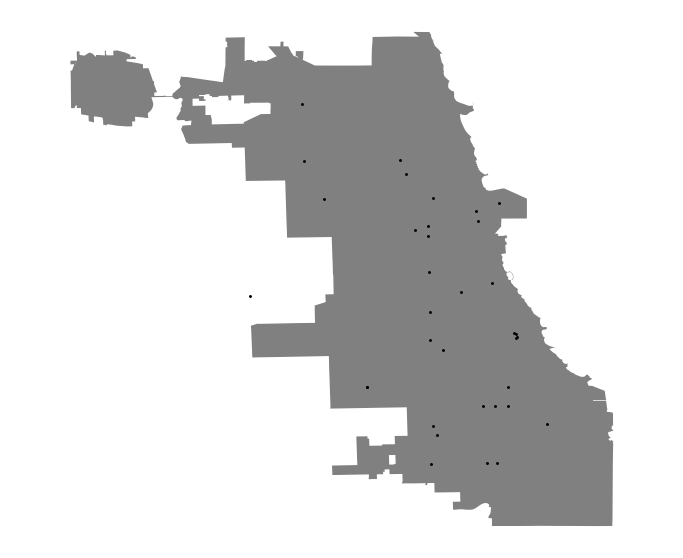

In [11]:
fig, ax = plt.subplots(figsize=(12, 10))

boundary = gpd.read_file("./il-chicago.shp")
boundary.plot(ax=ax, color="gray")

gdf.plot(ax=ax, markersize=3.5, color="black")
ax.axis("off")
plt.axis('equal')
plt.show()

In [13]:
gdf.crs = "epsg:4326"
gdf = gdf.to_crs(epsg=3857)

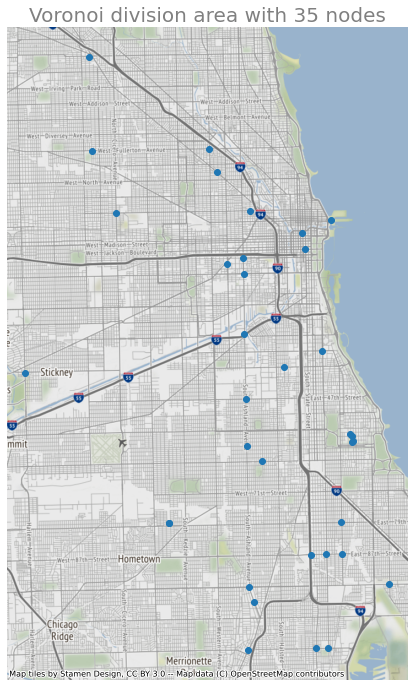

In [15]:
fig, ax = plt.subplots(figsize=(12, 12))
gdf.to_crs(epsg=3857).plot(ax=ax)
ctx.add_basemap(ax)
plt.title('Voronoi division area with 35 nodes', fontsize=20, fontname="Palatino Linotype", color="grey")
ax.axis("off")
#plt.axis('equal')
plt.show()

In [16]:
boundary.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

epsg4326 is the code of WGS84.
EPSG:3857 (Pseudo-Mercator).
Before calculating the Voronoi region, we need to determine two things. First, we need to check the projection of the data, and then convert it to web Mercator projection.

In [17]:
boundary = boundary.to_crs(epsg=3857)
gdf_proj = gdf.to_crs(boundary.crs)

In [18]:
print(gdf_proj)

         node_id         lat                 lon  \
0   001e0610ba46   41.878377          -87.627678   
1   001e0610ba13   41.751238           -87.71299   
2   001e0610bc10   41.736314          -87.624179   
3   001e0610ba15   41.722457           -87.57535   
4   001e0610bbe5   41.736495          -87.614529   
5   001e0610ee36   41.751295          -87.605288   
6   001e0610ee5d   41.923996          -87.761072   
7   001e06113ad8   41.866786          -87.666306   
8   001e0611441e   41.808594          -87.665048   
9   001e06112e77   41.786756          -87.664343   
10  001e0610f6db   41.791329          -87.598677   
11  001e06113107   41.751142           -87.71299   
12  001e06113ace    41.83107          -87.617298   
13  001e06113a24   41.788979          -87.597995   
14  001e061144cd     41.8742          -87.666599   
15  001e061146cb  41.9140942          -87.683022   
16  001e0610f703    41.87148           -87.67644   
17  001e0611462f   41.823527          -87.641054   
18  001e0610

Second, we need to prepare the data in a format that the geovoroni library can use. Here, we convert the boundary geometry into the union of polygons. We also convert the geopandas geoseries of the point object to a numpy coordinate array.

In [19]:
boundary_shape = cascaded_union(boundary.geometry)
boundary_shape
print(boundary_shape)

POLYGON ((-9789447.263629049 5161118.155368196, -9789106.737306712 5161133.884100839, -9788880.647420911 5161142.722161997, -9788910.926322406 5161858.93195112, -9788903.022638561 5162201.701044681, -9788687.285465401 5162205.446404438, -9788685.059075586 5162205.446404438, -9788685.059075586 5162202.599930888, -9788685.170395078 5162194.060515345, -9788685.281714568 5162191.363859395, -9788664.687608771 5161807.098187465, -9788667.025318079 5161787.772954661, -9788363.568386177 5161726.801352962, -9788280.190087572 5161712.12028846, -9788278.408975719 5161711.820675134, -9788266.163831731 5161711.071641859, -9788248.575352186 5161703.281699305, -9788240.449029358 5161721.707919857, -9788236.775486162 5161726.351932283, -9787816.099130454 5162068.367196265, -9787521.325118832 5161898.481602009, -9787302.916277898 5161570.404236698, -9787301.023846554 5161571.003454468, -9787295.346552523 5161573.10071696, -9787293.565440672 5161573.84973939, -9787286.663632242 5161615.345674004, -97872

In [20]:
coords = points_to_coords(gdf_proj.geometry)
print(coords)

[[-9754668.49435694  5142778.283298  ]
 [-9764165.3827555   5123788.63387065]
 [-9754278.98745866  5121562.0342837 ]
 [-9748843.36804271  5119495.08990342]
 [-9753204.7543725   5121589.03564142]
 [-9752176.05095808  5123797.13902907]
 [-9769517.84651182  5149601.20386986]
 [-9758968.5436473   5141045.47316661]
 [-9758828.50372789  5132350.73559334]
 [-9758750.02348688  5129089.85679414]
 [-9751440.11780445  5129772.61118212]
 [-9764165.3827555   5123774.30941038]
 [-9753512.99804251  5135708.04237428]
 [-9751364.19791172  5129421.74727864]
 [-9759001.16025811  5142153.80157088]
 [-9760829.3602554   5148119.84536232]
 [-9760096.655367    5141747.17033984]
 [-9756157.50386579  5134581.19071313]
 [-9752117.16294745  5121603.65519282]
 [-9758532.72784085  5145436.93617508]
 [-9751444.12530611  5129366.35674859]
 [-9761350.44679181  5149736.90707184]
 [-9767819.66767977  5145264.65458054]
 [-9752883.49745402  5144815.73504817]
 [-9758899.41424352  5136902.71287518]
 [-9769684.60310903  5156

#Calculation area

Using voronoi_regions_from_coords() to calculate the area.

In [21]:
# Calculate Voronoi Regions
# poly_shapes, pts, poly_to_pt_assignments = voronoi_regions_from_coords(coords, boundary_shape)
region_polys, region_pts = voronoi_regions_from_coords(coords, boundary_shape)

Using plot_voronoi_polys_with_points_in_area () draws Voronoi diagram. Here, we provide all the outputs of the above Voronoi calculation and boundary shape.

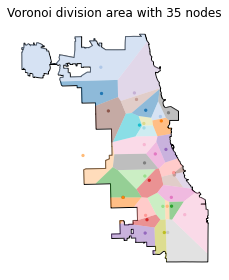

In [23]:
fig, ax = subplot_for_map()

plot_voronoi_polys_with_points_in_area(ax, boundary_shape, region_polys, coords, region_pts)

ax.set_title('Voronoi division area with 35 nodes')

plt.tight_layout()
plt.show()

In [23]:
plot_voronoi_polys_with_points_in_area?

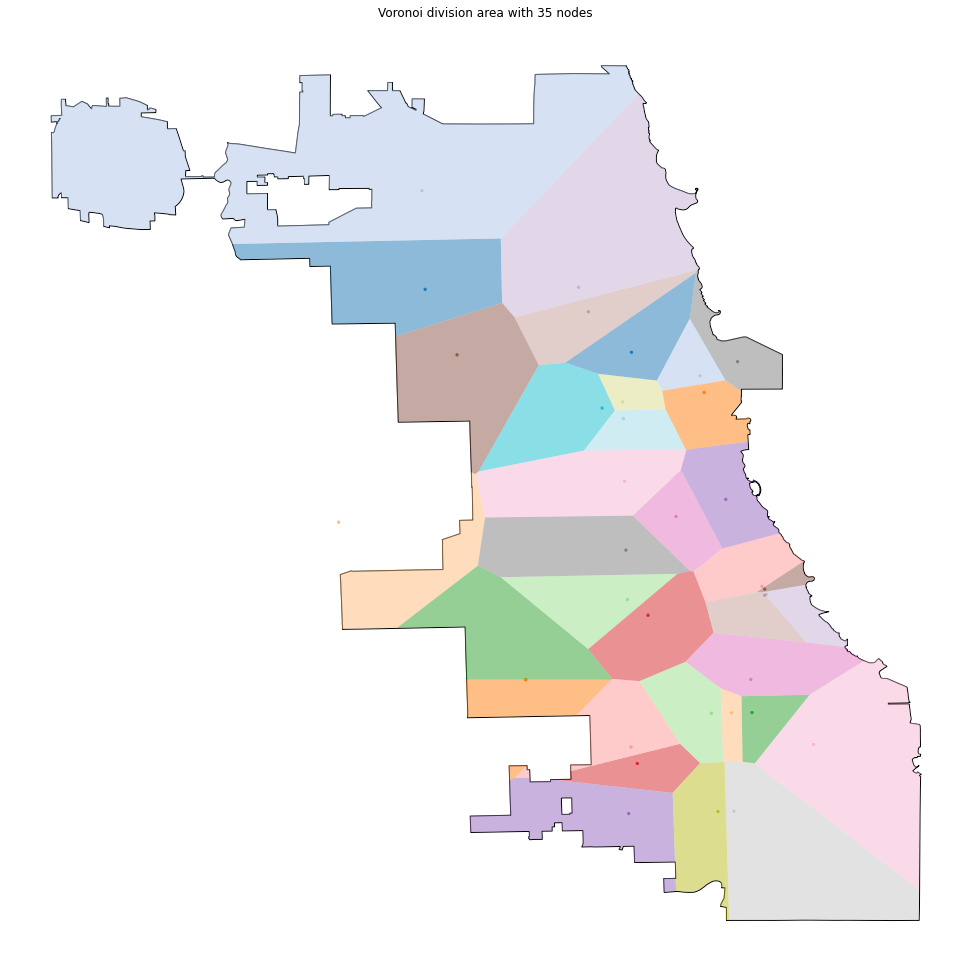

In [24]:
fig, ax = plt.subplots(figsize=(14,14))

plot_voronoi_polys_with_points_in_area(ax, boundary_shape, region_polys, coords, region_pts)

ax.set_title('Voronoi division area with 35 nodes')

plt.tight_layout()
ax.axis("off")
plt.show()

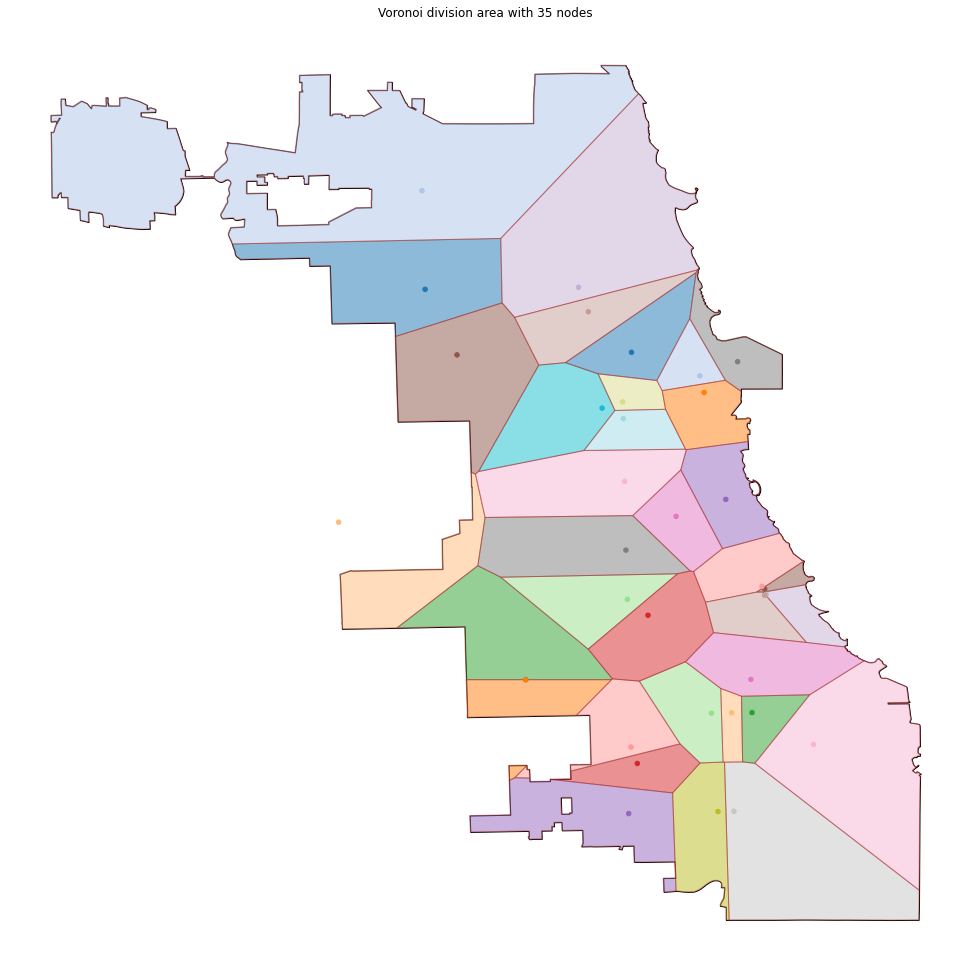

In [26]:
fig, ax = plt.subplots(figsize=(14,14))

plot_voronoi_polys_with_points_in_area(ax, boundary_shape, region_polys, coords, region_pts, voronoi_color="lightgray", voronoi_edgecolor="brown",points_markersize=20)

ax.set_title('Voronoi division area with 35 nodes')

plt.tight_layout()
ax.axis("off")
plt.show()

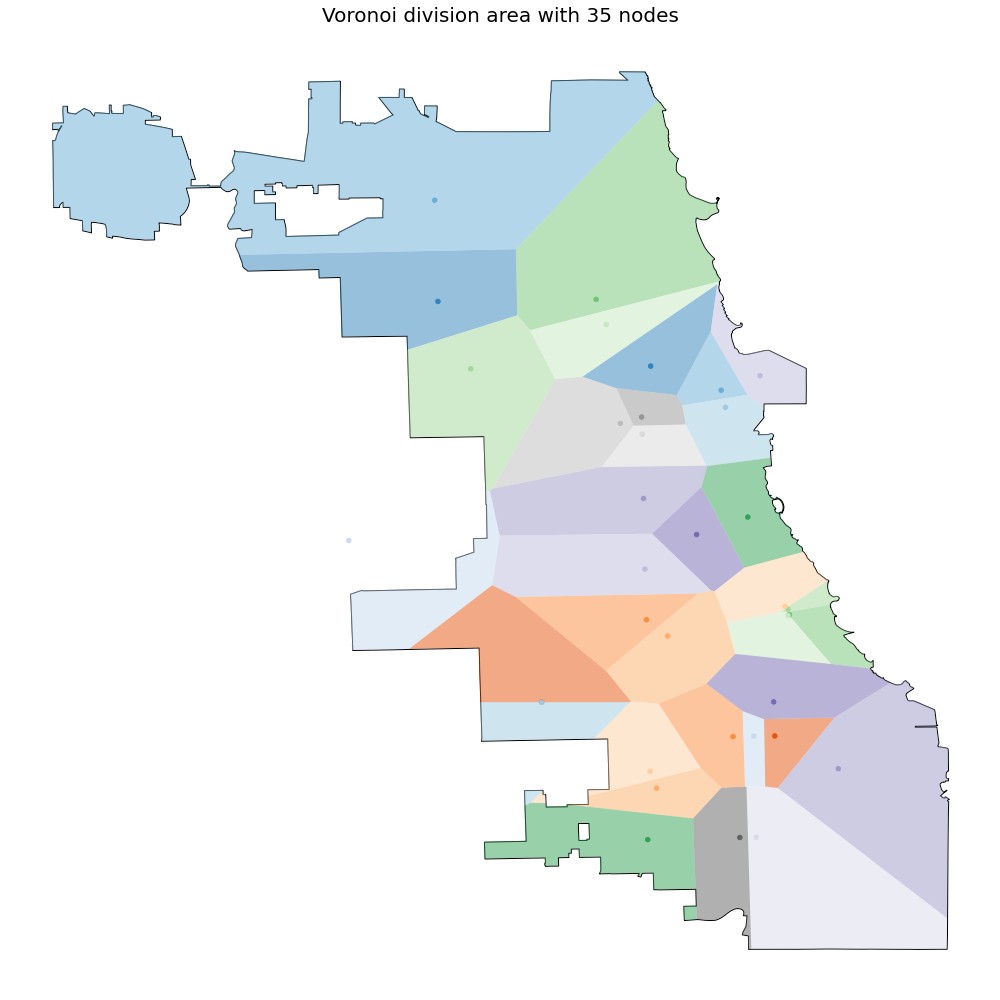

In [28]:
fig, ax = plt.subplots(figsize=(14,14))

plot_voronoi_polys_with_points_in_area(ax, boundary_shape, region_polys, coords, region_pts,
                                       voronoi_and_points_cmap='tab20c',
                                      points_markersize=20)

ax.set_title('Voronoi division area with 35 nodes',fontsize=20)
ax.axis("off")
plt.tight_layout()
plt.show()